# Import Data

In [239]:
import pandas as pd

In [312]:
# recompute tresholds for when gaze is on one of the character (standard/exact box should be 40):
def recompute_treshold(df, thresh):
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Env"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] < thresh),"Gaze_focus"] = "AI"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] < df["gaze_to_ai"]),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] > df["gaze_to_ai"]),"Gaze_focus"] = "AI"
    return df

In [393]:
# read in merged csvs
threshold = 40
path = "gaze_agent_merged/"
data = {}

for i in range(1,6):
    if i not in [11, 24, 26, 32, 34]:
        if i<10:
            participant="P0"+str(i)
        else:
            participant="P"+str(i)
            data[participant]={}
        # add dict entry
        data[participant]={}
        
        data[participant]["000"]=recompute_treshold(pd.read_csv(path+participant+"_000_merged.csv", sep=";"), threshold)
        data[participant]["001"]=recompute_treshold(pd.read_csv(path+participant+"_001_merged.csv", sep=";"), threshold)
    

In [394]:
# check if all 30 are read in
print(len(data), "files were loaded")

5 files were loaded


In [395]:
# sanity check
data["P01"]["001"].head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,17,647.758690,193.043993,734.0,329,589.0,330,17,161.001861,149.028626,Env,Confusion
1,18,488.885407,397.716899,734.0,329,642.5,320,18,254.564679,172.155045,Env,Confusion
2,19,491.247234,394.674239,733.5,329,654.0,320,19,250.997029,179.066203,Env,Confusion
3,20,484.855397,406.854818,734.0,328,658.0,320,20,261.325689,193.708061,Env,Confusion
4,21,659.274050,347.087902,735.0,327,659.5,318,21,78.345028,29.088779,AI,Confusion


# Frame Counts 

In [396]:
counters={"lvl1":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}},
          "lvl2":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}}
         }


In [397]:
for p in data:
    print(p)
    # add counts for lvl1
    counters["lvl1"]["Gaze"]["AI"]+=(data[p]["000"].Gaze_focus == 'AI').sum()
    counters["lvl1"]["Gaze"]["Human"]+=(data[p]["000"].Gaze_focus == 'Human').sum()
    counters["lvl1"]["Gaze"]["Env"]+=(data[p]["000"].Gaze_focus == 'Env').sum()
    counters["lvl1"]["Condition"]["Error"]+=(data[p]["000"].Condition == 'Error').sum()
    counters["lvl1"]["Condition"]["Confusion"]+=(data[p]["000"].Condition == 'Confusion').sum()
    counters["lvl1"]["Condition"]["Normal"]+=(data[p]["000"].Condition == 'Normal').sum()
    
    # add counts for lvl2
    counters["lvl2"]["Gaze"]["AI"]+=(data[p]["001"].Gaze_focus == 'AI').sum()
    counters["lvl2"]["Gaze"]["Human"]+=(data[p]["001"].Gaze_focus == 'Human').sum()
    counters["lvl2"]["Gaze"]["Env"]+=(data[p]["001"].Gaze_focus == 'Env').sum()
    counters["lvl2"]["Condition"]["Error"]+=(data[p]["001"].Condition == 'Error').sum()
    counters["lvl2"]["Condition"]["Confusion"]+=(data[p]["001"].Condition == 'Confusion').sum()
    counters["lvl2"]["Condition"]["Normal"]+=(data[p]["001"].Condition == 'Normal').sum()
    
counters    

P01
P02
P03
P04
P05


{'lvl1': {'Gaze': {'AI': 101, 'Human': 951, 'Env': 3983},
  'Condition': {'Error': 277, 'Confusion': 2744, 'Normal': 2014}},
 'lvl2': {'Gaze': {'AI': 283, 'Human': 1196, 'Env': 3331},
  'Condition': {'Error': 366, 'Confusion': 364, 'Normal': 4080}}}

In [398]:
#counters={"lvl1":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}},
#          "lvl2":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}}
#         }
#
#for p in data:
#    print(p)
#    # add counts for lvl1
#    counters["lvl1"]["Gaze"]["AI"].append((data[p]["000"].Gaze_focus == 'AI').sum())
#    counters["lvl1"]["Gaze"]["Human"].append((data[p]["000"].Gaze_focus == 'Human').sum())
#    counters["lvl1"]["Gaze"]["Env"].append((data[p]["000"].Gaze_focus == 'Env').sum())
#    counters["lvl1"]["Condition"]["Error"].append((data[p]["000"].Condition == 'Error').sum())
#    counters["lvl1"]["Condition"]["Confusion"].append((data[p]["000"].Condition == 'Confusion').sum())
#    counters["lvl1"]["Condition"]["Normal"].append((data[p]["000"].Condition == 'Normal').sum())
#    
#    # add counts for lvl2
#    counters["lvl2"]["Gaze"]["AI"].append((data[p]["001"].Gaze_focus == 'AI').sum())
#    counters["lvl2"]["Gaze"]["Human"].append((data[p]["001"].Gaze_focus == 'Human').sum())
#    counters["lvl2"]["Gaze"]["Env"].append((data[p]["001"].Gaze_focus == 'Env').sum())
#    counters["lvl2"]["Condition"]["Error"].append((data[p]["001"].Condition == 'Error').sum())
#    counters["lvl2"]["Condition"]["Confusion"].append((data[p]["001"].Condition == 'Confusion').sum())
#    counters["lvl2"]["Condition"]["Normal"].append((data[p]["001"].Condition == 'Normal').sum())
#    
#counters    

# Compute AoI Analysis for the 3 Conditions

In [399]:
# for each particpant compute the percentage looked at agent/human/env for the different conditions conf/err/bau
for p in data:
    print(p)
    # compute stats
    data[p]["stats"]={}
    lvls_concatenated=pd.concat([data[p]["000"], data[p]["001"]], ignore_index=True, sort=False)
    data[p]["stats"]["overall"]=lvls_concatenated.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl1"]=data[p]["000"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl2"]=data[p]["001"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)

P01
P02
P03
P04
P05


<AxesSubplot:xlabel='Condition'>

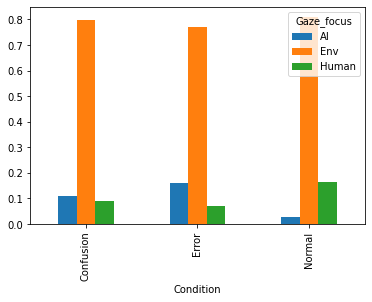

In [400]:
# plot that data for a single sample
data["P02"]["stats"]["lvl2"].plot(kind="bar")

In [401]:
# plot that data averaged over all
list_of_stats=[]
list_of_stats_lvl1=[]
list_of_stats_lvl2=[]
for p in data:
    list_of_stats.append(data[p]["stats"]["overall"])
    list_of_stats_lvl1.append(data[p]["stats"]["lvl1"])
    list_of_stats_lvl2.append(data[p]["stats"]["lvl2"])
list_of_stats

[Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.033510  0.816578  0.149912
 Error       0.037037  0.562963  0.400000
 Normal      0.046372  0.727749  0.225879,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.035280  0.874696  0.090024
 Error       0.160920  0.770115  0.068966
 Normal      0.056711  0.803403  0.139887,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.006696  0.621652  0.371652
 Error       0.171429  0.328571  0.500000
 Normal      0.075145  0.559538  0.365318,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.043360  0.869919  0.086721
 Error       0.013986  0.958042  0.027972
 Normal      0.031370  0.882843  0.085787,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.033040  0.713656  0.253304
 Error       0.024038  0.64423

In [402]:
stats_overall_concat=pd.concat(list_of_stats)
stats_lvl1_concat=pd.concat(list_of_stats_lvl1)
stats_lvl2_concat=pd.concat(list_of_stats_lvl2)
stats_overall_concat

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.033510,0.816578,0.149912
Error,0.037037,0.562963,0.400000
Normal,0.046372,0.727749,0.225879
Confusion,0.035280,0.874696,0.090024
Error,0.160920,0.770115,0.068966
Normal,0.056711,0.803403,0.139887
Confusion,0.006696,0.621652,0.371652
Error,0.171429,0.328571,0.500000
Normal,0.075145,0.559538,0.365318


In [403]:
by_row_index = stats_overall_concat.groupby(stats_overall_concat.index)
df_means_overall = by_row_index.mean()
df_std_overall = by_row_index.std()
print(df_means_overall)
print(df_std_overall)

Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.030377  0.779300  0.190323
Error       0.081482  0.652784  0.265734
Normal      0.045850  0.721593  0.232557
Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.013877  0.109389  0.121730
Error       0.077832  0.234629  0.207673
Normal      0.021635  0.129026  0.123135


<AxesSubplot:xlabel='Condition'>

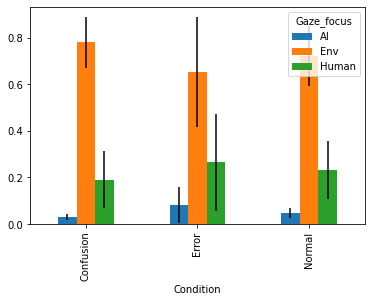

In [404]:
# plot averaged for all participants
df_means_overall.plot(kind="bar", yerr=df_std_overall)

<AxesSubplot:xlabel='Condition'>

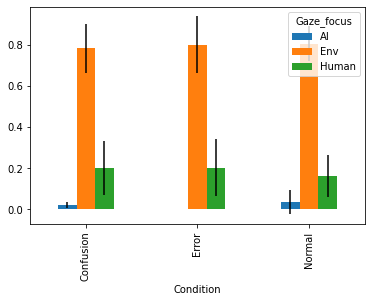

In [405]:
# plot that data averaged over lvl1 
by_row_index_lvl1 = stats_lvl1_concat.groupby(stats_lvl1_concat.index)
df_means_lvl1 = by_row_index_lvl1.mean()
df_std_lvl1 = by_row_index_lvl1.std()
df_means_lvl1.plot(kind="bar", yerr=df_std_lvl1)

<AxesSubplot:xlabel='Condition'>

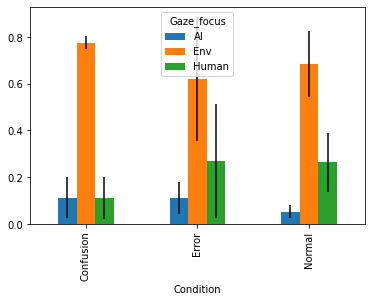

In [406]:
# plot that data averaged over lvl2 
by_row_index_lvl2 = stats_lvl2_concat.groupby(stats_lvl2_concat.index)
df_means_lvl2 = by_row_index_lvl2.mean()
df_std_lvl2 = by_row_index_lvl2.std()
df_means_lvl2.plot(kind="bar", yerr=df_std_lvl2)

# Export for SPSS



In [407]:
participants=[]
workflow_ai=[]
workflow_human=[]
workflow_env=[]
conf_ai=[]
conf_human=[]
conf_env=[]
err_ai=[]
err_human=[]
err_env=[]

In [408]:
data["P04"]["stats"]["overall"]

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.043360,0.869919,0.086721
Error,0.013986,0.958042,0.027972
Normal,0.031370,0.882843,0.085787


In [409]:
data["P04"]["stats"]["overall"]["AI"]["Confusion"]

0.04336043360433604

In [410]:
for p in data:
    participants.append(p)
    stats_overall=data[p]["stats"]["overall"]
    
    workflow_ai.append(stats_overall["AI"]["Normal"])
    workflow_human.append(stats_overall["Human"]["Normal"])
    workflow_env.append(stats_overall["Env"]["Normal"])
    
    conf_ai.append(stats_overall["AI"]["Confusion"])
    conf_human.append(stats_overall["Human"]["Confusion"])
    conf_env.append(stats_overall["Env"]["Confusion"])
    
    err_ai.append(stats_overall["AI"]["Error"])
    err_human.append(stats_overall["Human"]["Error"])
    err_env.append(stats_overall["Env"]["Error"])
    

In [413]:
# export collected data to csv for analysis in spss
spss_data = {'participant_id': participants, 
             'Workflow_AI': workflow_ai, 'Workflow_Human': workflow_human, 'Workflow_Env': workflow_env, 
             'Conf_AI': conf_ai, 'Conf_Human': conf_human, 'Conf_Env': conf_env,
             'Err_AI': err_ai, 'Err_Human': err_human, 'Err_Env': err_env,}
spss_df = pd.DataFrame(data=spss_data)
spss_df

,participant_id,Workflow_AI,Workflow_Human,Workflow_Env,Conf_AI,Conf_Human,Conf_Env,Err_AI,Err_Human,Err_Env
0,P01,0.046372,0.225879,0.727749,0.033510,0.149912,0.816578,0.037037,0.400000,0.562963
1,P02,0.056711,0.139887,0.803403,0.035280,0.090024,0.874696,0.160920,0.068966,0.770115
2,P03,0.075145,0.365318,0.559538,0.006696,0.371652,0.621652,0.171429,0.500000,0.328571
3,P04,0.031370,0.085787,0.882843,0.043360,0.086721,0.869919,0.013986,0.027972,0.958042
4,P05,0.019654,0.345912,0.634434,0.033040,0.253304,0.713656,0.024038,0.331731,0.644231


In [415]:
spss_df.to_csv("data_for_spss.csv", index=False)